In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder, MultiLabelBinarizer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    mean_squared_error, mean_absolute_error, r2_score,
    roc_auc_score, roc_curve
)
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
import matplotlib.pyplot as plt
pd.set_option('display.float_format', '{:.4f}'.format)

import json
import glob

In [2]:
all_data = []
for file in glob.glob("../data/processed/*.json"):
    print(file)
    with open(file, "r") as f:
        all_data.extend(json.load(f))

df = pd.DataFrame(all_data)
df = df.dropna(thresh=8)
df = df.reset_index(drop=True)

../data/processed\channels0_99.json
../data/processed\channels100_.json
../data/processed\channels3425_.json
../data/processed\channels6727_.json
../data/processed\channelsa10034_.json
../data/processed\channelsa13313_.json
../data/processed\channels_missing.json


In [3]:
df["created_date"] = pd.to_datetime(df["created_date"], format="ISO8601")

In [4]:
df.head()

,channel_id,channel_name,description,country,defaultLanguage,created_date,category,aggregated_tags,most_common_video_genre,all_video_genres,avg_duration_seconds,avg_seconds_between_uploads,recent_video_titles
0,UCOmHUn--16B90oW2L6FRR3A,BLACKPINK,BLACKPINK Official YouTube Channel\n블랙핑크 공식 유튜...,KR,None,2016-06-29 03:15:23+00:00,"[Electronic music, Pop music, Music of Asia, M...","[JISOO, YG, JENNIE You & Me, LISA, JENNIE 유앤미,...",Music,[Music],211.6000,1017992.8900,[BLACKPINK - WORLD TOUR [DEADLINE] IN HONG KON...
1,UC3IZKseVpdzPSBaWxBxundA,HYBE LABELS,Welcome to the official YouTube channel of HYB...,KR,None,2008-06-04 08:23:22+00:00,"[Pop music, Music, Music of Asia]","[하이브, 하이브레이블즈, HYBE LABELS, HYBE]",Music,[Music],89.6000,131588.1100,[SANTOS BRAVOS “KAWASAKI (&TEAM Remix)” Lyric ...
2,UCF1JIbMUs6uqoZEY1Haw0GQ,Shemaroo,"Welcome to ShemarooEnt, one of the finest dest...",IN,None,2007-09-01 11:44:51+00:00,"[Film, Entertainment]","[salman khan movies, ramcharana moves, Mega Po...",Entertainment,[Entertainment],5336.1000,45200.0000,[Mega Power Star Ram Charan 👑 | Zanjeer (4K Ac...
3,UCYiGq8XF7YQD00x7wAd62Zg,JuegaGerman,Lento pero seguro.,CL,None,2013-05-19 00:09:13+00:00,"[Action game, Video game culture, Action-adven...","[revenia, juega german, juego de miedo, click ...",Gaming,[Gaming],2046.9000,280466.0000,"[Fotos Tomadas En El Momento PERFECTO 📸, Traba..."
4,UC4NALVCmcmL5ntpV0thoH6w,LooLoo Kids - Nursery Rhymes and Children's Songs,LooLoo Kids💖 is an educational YouTube channel...,US,en,2014-08-05 20:15:33+00:00,"[Entertainment, Music, Film]","[kids videos, children songs, farm song nurser...",Music,[Music],148.5000,181623.8900,[Old Macdonald Had a Farm Song + Johny Johny Y...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15743 entries, 0 to 15742
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype              
---  ------                       --------------  -----              
 0   channel_id                   15743 non-null  object             
 1   channel_name                 15743 non-null  object             
 2   description                  15743 non-null  object             
 3   country                      13977 non-null  object             
 4   defaultLanguage              1725 non-null   object             
 5   created_date                 15743 non-null  datetime64[ns, UTC]
 6   category                     15743 non-null  object             
 7   aggregated_tags              15743 non-null  object             
 8   most_common_video_genre      15743 non-null  object             
 9   all_video_genres             15743 non-null  object             
 10  avg_duration_seconds         15743 non-null  f

In [6]:
time_cols = ["created_date"]
num_cols = ["avg_duration_seconds", "avg_seconds_between_uploads"]
basic_cat_cols = ["country", "most_common_video_genre"]
multi_cat_cols = ["category", "all_video_genres"]
text_cols = ["description", "aggregated_tags", "recent_video_titles"]
drop_cols = ["channel_id", "channel_name", "defaultLanguage"]
set(time_cols + num_cols + basic_cat_cols + multi_cat_cols + text_cols + drop_cols) == set(df.columns)

True

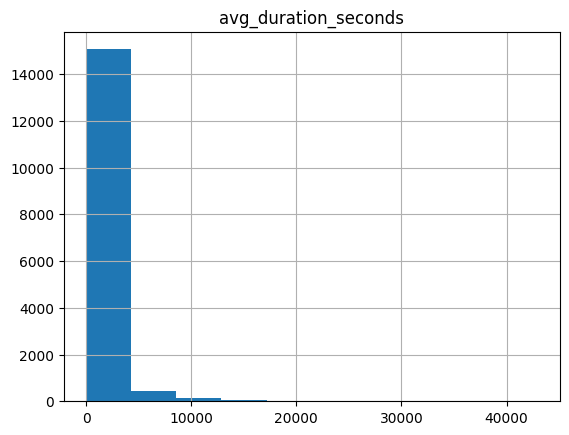

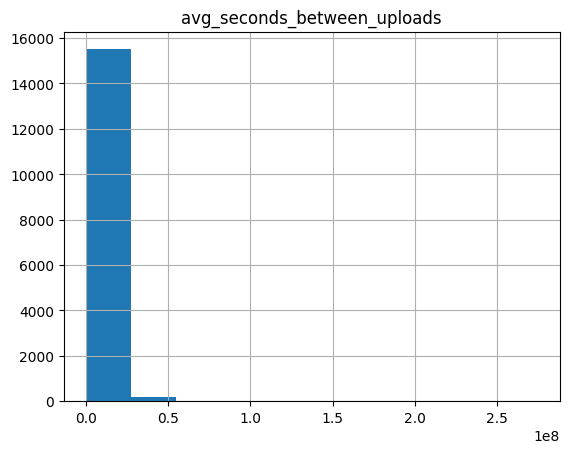

In [7]:
for col in num_cols:
    plt.figure()
    df[col].hist()
    plt.title(col)
    plt.show()

lets investigate the outliers that are stretching the x axis

In [8]:
20000/3600

5.555555555555555

In [9]:
df[df["avg_duration_seconds"] > 20000][["channel_name", "avg_duration_seconds"]].sort_values("avg_duration_seconds", ascending=False)

,channel_name,avg_duration_seconds
10770,Relaxing Nature In 4K,42898.5000
1217,BogMonsterZ,39552.2000
7143,Zombies Gameplay,39463.3000
2630,Ensiklopedia Al Fatih,38830.7000
12071,LimeTube_Brasil,35899.1000
4521,Scary Teacher 3D Gaming,34701.0000
10046,Lets Test Laurence,34311.8000
6394,Lullaby Baby,32258.3000
3553,Moxie2D,31271.4000
12673,Monkey Daily,29487.6000


i mean this data is accurate, doesnt make much sense to eliminate these  
perhaps in the future different models for different types of channels?

In [10]:
df[df["avg_seconds_between_uploads"] > 0.5e8][["channel_name", "avg_seconds_between_uploads"]].sort_values("avg_seconds_between_uploads", ascending=False)

,channel_name,avg_seconds_between_uploads
14097,Aroma Split,274585951.0000
4134,Amazon Discount Fairy,188125779.0000
4996,GrumpyDog,173057004.0000
11725,Fainted,142978334.0000
12216,WrzzerPlays,130692525.5000
5532,MemerMan,114461443.0000
1424,xuxaVEVO,105494390.5000
3630,Jefflau,102715158.2000
3260,Wrestle Highlights,87522211.0000
6995,officialTUNA,82096709.0000


In [11]:
274585951.0000 / 86400

3178.078136574074

recall 0 values in avg_duration_seconds were errors...  
also None values for avg video gap investigate?  
basically yt channels with little/no uploads, impersonation channels...  

honestly i think i should just build model and revise these data problems in iteration 2

preprocessing pipeline next

In [12]:
time_cols = ["created_date"]
num_cols = ["avg_duration_seconds", "avg_seconds_between_uploads"]
basic_cat_cols = ["country", "most_common_video_genre"]
multi_cat_cols = ["category", "all_video_genres"]
text_cols = ["description", "aggregated_tags", "recent_video_titles"]
drop_cols = ["channel_id", "channel_name", "defaultLanguage"]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15743 entries, 0 to 15742
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype              
---  ------                       --------------  -----              
 0   channel_id                   15743 non-null  object             
 1   channel_name                 15743 non-null  object             
 2   description                  15743 non-null  object             
 3   country                      13977 non-null  object             
 4   defaultLanguage              1725 non-null   object             
 5   created_date                 15743 non-null  datetime64[ns, UTC]
 6   category                     15743 non-null  object             
 7   aggregated_tags              15743 non-null  object             
 8   most_common_video_genre      15743 non-null  object             
 9   all_video_genres             15743 non-null  object             
 10  avg_duration_seconds         15743 non-null  f

In [15]:
df[df["avg_duration_seconds"] == 0]

,channel_id,channel_name,description,country,defaultLanguage,created_date,category,aggregated_tags,most_common_video_genre,all_video_genres,avg_duration_seconds,avg_seconds_between_uploads,recent_video_titles
166,UCANLZYMidaCbLQFWXBC95Jg,TaylorSwiftVEVO,"I'm the problem, it's me.",US,en,2009-05-12 05:29:33+00:00,[Music],[],Music,[Music],0.0000,NaN,[TaylorSwiftVEVO Live Stream]
1459,UCG6XmGtwd0geNvV7CZKEACQ,KendjiGiracVEVO,"Kendji Girac sur Vevo – Clips Officiels, Lyric...",None,en,2014-06-17 15:51:52+00:00,[Music],[],Music,[Music],0.0000,NaN,[KendjiGiracVEVO Live Stream]
1570,UCW2afgCqiPQ6Y6EAiJAcH8A,Disar5,Canal de entretenimiento,None,None,2010-03-21 18:41:49+00:00,[],[],Entertainment,[Entertainment],0.0000,NaN,[Emisión en directo de Disar5]
1773,UCcMTZY1rFXO3Rj44D5VMyiw,Machinima,Machinima is the most notorious purveyor and c...,US,None,2006-01-17 01:37:54+00:00,[],"[not fortnite, not sponsored, help, Game Of Th...",Gaming,[Gaming],0.0000,NaN,[NEW PVP META? MASSIVE UPDATE! // 959+ Player ...
2129,UCJzfwEcHC2HZ6VvmEl-ulkA,BTWJUSTIN,SINCE 2015. 5. 26. \nreact to popular videos s...,US,None,2014-10-26 23:55:09+00:00,[],[],People & Blogs,[People & Blogs],0.0000,NaN,[BeasTWO님의 실시간 스트리밍]
2544,UCYlMSCISQkNhajMPIVqN8KA,Rob Plevin,We provide ready-made classroom management sol...,None,None,2010-01-07 11:30:41+00:00,[],[],Education,[Education],0.0000,NaN,[Rob Plevin (Behaviour Needs) Live Stream]
3037,UCruVT1tJ3S8r3tHSp6P4nCA,The House Protocol,Welcome to The House Protocol.\n\n​Bridging th...,US,None,2014-03-13 17:49:55+00:00,[],[],Entertainment,[Entertainment],0.0000,NaN,[Instant Wonders Live Stream]
3524,UCBP4B896svWOcWdRp8UjH2Q,Jace Norman,Jace Norman / Xander Norman // filmmakers / en...,US,None,2012-01-02 04:40:17+00:00,[],[],Entertainment,[Entertainment],0.0000,NaN,[Jace Norman Live Stream]
3641,UCi0ZJJC7ElVN0xl9GJ4V9aQ,Rebecca Maddie Challenges,,US,None,2020-05-02 21:08:04.510685+00:00,[],[],People & Blogs,[People & Blogs],0.0000,NaN,[Rebecca Maddie Challenges Live Stream]
4634,UCafYgzpyw7aIUYOLjjADu7w,News18 UP Uttarakhand,SUBSCRIBE to get the Latest News & Updates - h...,IN,None,2010-06-16 10:11:50+00:00,"[Politics, Society]","[iran news today, america iran war live, ameri...",News & Politics,[News & Politics],0.0000,207.5600,[Iran America War Live: ट्रंप के निशाने पर सुप...


In [18]:
df[df["recent_video_titles"].apply(lambda x: len(x) <= 1)]

,channel_id,channel_name,description,country,defaultLanguage,created_date,category,aggregated_tags,most_common_video_genre,all_video_genres,avg_duration_seconds,avg_seconds_between_uploads,recent_video_titles
166,UCANLZYMidaCbLQFWXBC95Jg,TaylorSwiftVEVO,"I'm the problem, it's me.",US,en,2009-05-12 05:29:33+00:00,[Music],[],Music,[Music],0.0000,NaN,[TaylorSwiftVEVO Live Stream]
1459,UCG6XmGtwd0geNvV7CZKEACQ,KendjiGiracVEVO,"Kendji Girac sur Vevo – Clips Officiels, Lyric...",None,en,2014-06-17 15:51:52+00:00,[Music],[],Music,[Music],0.0000,NaN,[KendjiGiracVEVO Live Stream]
1570,UCW2afgCqiPQ6Y6EAiJAcH8A,Disar5,Canal de entretenimiento,None,None,2010-03-21 18:41:49+00:00,[],[],Entertainment,[Entertainment],0.0000,NaN,[Emisión en directo de Disar5]
1773,UCcMTZY1rFXO3Rj44D5VMyiw,Machinima,Machinima is the most notorious purveyor and c...,US,None,2006-01-17 01:37:54+00:00,[],"[not fortnite, not sponsored, help, Game Of Th...",Gaming,[Gaming],0.0000,NaN,[NEW PVP META? MASSIVE UPDATE! // 959+ Player ...
1836,UCFfO_LunUG-5ZXCcrg2Hc3g,Funny Kids,We love our funny kids. The earth is more beau...,None,None,2015-08-01 11:06:44+00:00,[],[Am A Gummy Bear (The Gummy Bear Song) (Musica...,People & Blogs,[People & Blogs],151.0000,NaN,[★ Just Dance Kids 2 - I'm a Gummy Bear (The G...
2129,UCJzfwEcHC2HZ6VvmEl-ulkA,BTWJUSTIN,SINCE 2015. 5. 26. \nreact to popular videos s...,US,None,2014-10-26 23:55:09+00:00,[],[],People & Blogs,[People & Blogs],0.0000,NaN,[BeasTWO님의 실시간 스트리밍]
2544,UCYlMSCISQkNhajMPIVqN8KA,Rob Plevin,We provide ready-made classroom management sol...,None,None,2010-01-07 11:30:41+00:00,[],[],Education,[Education],0.0000,NaN,[Rob Plevin (Behaviour Needs) Live Stream]
2838,UCEESFTxvnLsO_qjbFasFfwg,Desi Health Tips,,PK,None,2014-11-18 04:22:53+00:00,[],[],People & Blogs,[People & Blogs],163.0000,NaN,[I Am Back After 730 Days !!!]
2850,UCU7nMPggX3gFyIIYFax6kkw,Voicelove Balanced Nutrition,"Helping you lose fat, feel better, and keep it...",MK,None,2009-08-13 14:11:05+00:00,[],"[One, Will, Yeah, Sound, Game, Movie, Hangover...",Film & Animation,[Film & Animation],383.0000,NaN,[Project X - Yeah Yeah Yeahs - Heads Will Ro...
3037,UCruVT1tJ3S8r3tHSp6P4nCA,The House Protocol,Welcome to The House Protocol.\n\n​Bridging th...,US,None,2014-03-13 17:49:55+00:00,[],[],Entertainment,[Entertainment],0.0000,NaN,[Instant Wonders Live Stream]


fair amount of channels with not much videos...i dont really want these

In [19]:
df[df["category"].apply(lambda x: len(x) == 0)]

,channel_id,channel_name,description,country,defaultLanguage,created_date,category,aggregated_tags,most_common_video_genre,all_video_genres,avg_duration_seconds,avg_seconds_between_uploads,recent_video_titles
508,UC-ASDT9n-sUPwA7uUPN0OoQ,Calon Sarjana,Selamat datang di channel Calon Sarjana Kedua ...,ID,None,2017-08-09 07:24:38+00:00,[],"[Calon Sarjana, Aneh tapi nyata, Misteri, vira...",Entertainment,[Entertainment],659.1000,48000.2200,[OTAKMU BAKAL MELEDAK! 🧠⚠️ Inilah Teknik Out o...
1195,UC7QoBWa_qo29Heg4LYYsm-g,TomoNews Indonesia,Selamat datang di TomoNews Indonesia!\n\nKami ...,ID,None,2015-10-23 07:13:30+00:00,[],"[Next Animation Studio, TomoNews, News Animati...",News & Politics,[News & Politics],43.0000,21599.4400,"[Mengharukan, Wanita Kenakan Baju Pengantin di..."
1335,UCOaD4JxNYk29LHbHTOx3SQA,Did You Know ?,"Welcome to the official YouTube channel, Did Y...",US,en,2016-02-15 19:52:17+00:00,[],"[drone footage, Sees, Screaming, stories, weir...",Education,[Education],591.9000,28800.0000,[Girl Finds Strange Coin In The Forest - Next ...
1570,UCW2afgCqiPQ6Y6EAiJAcH8A,Disar5,Canal de entretenimiento,None,None,2010-03-21 18:41:49+00:00,[],[],Entertainment,[Entertainment],0.0000,NaN,[Emisión en directo de Disar5]
1773,UCcMTZY1rFXO3Rj44D5VMyiw,Machinima,Machinima is the most notorious purveyor and c...,US,None,2006-01-17 01:37:54+00:00,[],"[not fortnite, not sponsored, help, Game Of Th...",Gaming,[Gaming],0.0000,NaN,[NEW PVP META? MASSIVE UPDATE! // 959+ Player ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15154,UCAPByrKU5-R1emswVlyH_-g,Motiversity,Motiversity is one of the largest motivational...,CA,en,2015-06-23 03:00:10+00:00,[],"[motivational, mindset, matthew mcconaughey, m...",Education,[Education],687.2000,141693.5600,"[Watch This, If You're Doubting Yourself... 😳 ..."
15257,UCGfgKimGJ4yueKEtFVPpHtw,The Relaxed Guy,"Sleep, Relax, and Study Better with my Rain, T...",AU,en,2014-10-14 14:05:43+00:00,[],"[strong rain, rain all night, rain at night, i...",Music,[Music],0.0000,144170.6700,[🔴 Rain Sounds for Sleeping - BLACK SCREEN - S...
15377,UCpAnJRWfF27StQcl0hN3gXA,Gravity Vibe,Welcome to South Moive Dhamaka! At South Movie...,IN,None,2021-12-23 14:11:49.137083+00:00,[],[],People & Blogs,[People & Blogs],291.0000,NaN,[गोविन्द मेरो है | GOVIND MERO HAI GOPAL MERO ...
15475,UC3Afj8DuNUu2PV74fJGw-Fw,Luka Big Pants,#1 fan of microplastics,CA,None,2014-01-21 01:28:59+00:00,[],"[VHS, computer, SMP, plushie, animation, creat...",Gaming,"[Entertainment, Gaming]",1458.4000,1554808.2200,"[i'm not a mouse, i'm not a mouse, the goblin ..."


nah lets leave it and just quickly make a neighbours algorithm and see what happens

In [ ]:
ct = make_column_transformer(
    (..., time_cols),
    (..., num_cols),
    (..., basic_cat_cols),
    (..., multi_cat_cols),
    (..., text_cols),
    ("drop", drop_cols)
)